In [ ]:
### Author : Vasista
### Date   : 12/11/2018
### Topic  : Selecting Imp Variables and removing Correlated Independent Variables.

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing


In [37]:
data = pd.read_csv('C:\Piazza\CUTe2\Retail_Train.csv', sep=',')
data.head()

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,C1104,3125,2,6,261,11,9,365,11,2,Area1,2
1,C1111,5298,2,5,323,9,9,218,3,2,Area1,1
2,C1117,4375,2,6,355,11,11,1367,11,2,Area1,2
3,C1128,9700,5,7,418,51,41,2947,51,1,Area1,1
4,C1132,3625,2,7,290,9,9,1233,8,2,Area1,3


In [38]:
# Basic Info Of Data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 12 columns):
PersonID                 2938 non-null object
Amount                   2938 non-null int64
FamilySize               2938 non-null int64
Distance                 2938 non-null int64
Duration                 2938 non-null int64
DirectVisits             2938 non-null int64
OnlineVisits             2938 non-null int64
Quantity                 2938 non-null int64
NumberofFrequentItems    2938 non-null int64
TransactionMode          2938 non-null int64
Area                     2938 non-null object
Occupation               2938 non-null int64
dtypes: int64(10), object(2)
memory usage: 275.5+ KB


In [39]:

#  data.isnull().sum(axis=0)            # Column wise NA's.
#  data.isnull().sum(axis=1)            # Row wise NA's

# Column wise Nulls Calculation

data.isnull().sum()
total_nulls = data.isnull().sum().sort_values(ascending=False)
percent_nulls = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
total_missing_data = pd.concat([total_nulls, percent_nulls], axis=1, keys=['Total_nulls', 'Percent_nulls'])
print(total_missing_data)


                       Total_nulls  Percent_nulls
Occupation                       0            0.0
Area                             0            0.0
TransactionMode                  0            0.0
NumberofFrequentItems            0            0.0
Quantity                         0            0.0
OnlineVisits                     0            0.0
DirectVisits                     0            0.0
Duration                         0            0.0
Distance                         0            0.0
FamilySize                       0            0.0
Amount                           0            0.0
PersonID                         0            0.0


In [40]:
# Data Type Conversions for Columns

retail = data.copy()
retail = retail.drop(labels='PersonID',axis=1)
retail['totalVisits'] = retail['DirectVisits'] + retail['OnlineVisits']
retail_new = retail.drop(labels=['OnlineVisits', 'DirectVisits'],axis=1)


retail_new['FamilySize'] = retail_new['FamilySize'].astype('object')
retail_new['TransactionMode'] = retail_new['TransactionMode'].astype('object')
retail_new['Occupation'] = retail_new['Occupation'].astype('object')

retail_new1 = pd.get_dummies(retail_new)

# Train Test Split

In [42]:
X = retail_new1.loc[:, retail_new1.columns != 'Amount']
Y = retail_new1[['Amount']]

trainX,testX,trainY,testY = train_test_split(X,Y, test_size=0.3, random_state = 10)

# Feature Importance Through Models.

# Decision Trees

In [43]:
tree_learner = DecisionTreeRegressor(min_samples_split=50, max_depth=5)
tree_learner.fit(trainX , trainY)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
# Important Features
print(tree_learner.feature_importances_)

# Make data frame with Imp_features w.r.t. their column names.
imp_features = pd.DataFrame({"Columns":trainX.columns, "imp_features":tree_learner.feature_importances_})
print(imp_features)             # Only Two Features are important as per "Decision Trees".

[0.         0.         0.         0.14184689 0.85815311 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
                  Columns  imp_features
0                Distance      0.000000
1                Duration      0.000000
2                Quantity      0.000000
3   NumberofFrequentItems      0.141847
4             totalVisits      0.858153
5            FamilySize_2      0.000000
6            FamilySize_3      0.000000
7            FamilySize_4      0.000000
8            FamilySize_5      0.000000
9            FamilySize_6      0.000000
10           FamilySize_7      0.000000
11           FamilySize_8      0.000000
12           FamilySize_9      0.000000
13          FamilySize_10      0.000000
14          FamilySize_12      0.000000
15      TransactionMode_1      0.000000
16      TransactionMode_2      0.000000
17             Area_Area1      0.000000
18             Ar

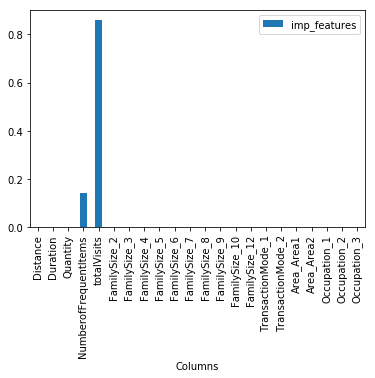

In [61]:
imp_features.plot.bar(x="Columns", y="imp_features")

In [ ]:
# How to fill missing values  row wise/column wise
# What percent of NA Columns/rows can be dropped.